# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import pylab
%matplotlib inline

In [2]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   51066 non-null  object
 1   Date Received  50996 non-null  object
 2   Incident Date  50496 non-null  object
 3   Airport Code   49014 non-null  object
 4   Airport Name   49014 non-null  object
 5   Airline Name   42511 non-null  object
 6   Claim Type     49106 non-null  object
 7   Claim Site     50876 non-null  object
 8   Item           50054 non-null  object
 9   Claim Amount   50074 non-null  object
 10  Status         51065 non-null  object
 11  Close Amount   33786 non-null  object
 12  Disposition    32846 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isna().sum(), 
                      round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                      tsa[i].nunique(), 
                      tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2008030740617, 2006012099958]"
1,Date Received,object,70,0.14,3522,"[7-Jun-12, 23-May-13]"
2,Incident Date,object,570,1.12,10788,"[8/4/2006 0:00, 12/28/2009 7:00]"
3,Airport Code,object,2052,4.02,405,"[GGG, RNO]"
4,Airport Name,object,2052,4.02,419,"[Natrona International, Fresno Yosemite Intern..."
5,Airline Name,object,8555,16.75,243,"[Iberia Airlines, Air Phillipines]"
6,Claim Type,object,1960,3.84,8,"[Passenger Theft, Personal Injury]"
7,Claim Site,object,190,0.37,6,"[Checked Baggage, Other]"
8,Item,object,1012,1.98,1854,[Eyeglasses - (including contact lenses); Watc...
9,Claim Amount,object,992,1.94,13248,"[$4;744.62 , $27.34 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
pd.isna(tsa).sum()

Claim Number         0
Date Received       70
Incident Date      570
Airport Code      2052
Airport Name      2052
Airline Name      8555
Claim Type        1960
Claim Site         190
Item              1012
Claim Amount       992
Status               1
Close Amount     17280
Disposition      18220
dtype: int64

In [9]:
tsa.replace('-', np.nan, inplace= True)

In [10]:
pd.isna(tsa).sum()

Claim Number         0
Date Received       70
Incident Date      570
Airport Code      2151
Airport Name      2151
Airline Name      9596
Claim Type        2031
Claim Site         249
Item              2148
Claim Amount      4180
Status            3189
Close Amount     17280
Disposition      18220
dtype: int64

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [11]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [12]:
i_d = []
error_id = []
for x, y in enumerate(tsa['Incident Date']):
    try:
        if pd.isna(y):
            i_d.append(np.nan)
        else:    
            i_d.append(pd.to_datetime(y))
    except:
        i_d.append(y)
        error_id.append(x)

In [13]:
tsa.iloc[error_id]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [14]:
def change_id(x):
    if str(x['Incident Date']) != 'nan':
        if (len(str(x['Incident Date'])) >= 17) and (x['Incident Date'][7] == '0'):
            changed_id = x['Incident Date'][:7] + str(x['Date Received'].year) + x['Incident Date'][11:]
            return changed_id
        else:
            return x
        
    else:
        return x
        
tsa['Incident Date'] = tsa[['Incident Date', 'Date Received']].apply(change_id, axis = 1)
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [15]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   51066 non-null  object        
 1   Date Received  50996 non-null  datetime64[ns]
 2   Incident Date  50496 non-null  datetime64[ns]
 3   Airport Code   48915 non-null  object        
 4   Airport Name   48915 non-null  object        
 5   Airline Name   41470 non-null  object        
 6   Claim Type     49035 non-null  object        
 7   Claim Site     50817 non-null  object        
 8   Item           48918 non-null  object        
 9   Claim Amount   46886 non-null  object        
 10  Status         47877 non-null  object        
 11  Close Amount   33786 non-null  object        
 12  Disposition    32846 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [16]:
tsa.iloc[error_id]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [17]:
tsa['Day Differences'] = tsa['Date Received'] - tsa['Incident Date']
tsa['Day Differences'] = tsa['Day Differences'].dt.days

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [18]:
import seaborn as sns
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Day Differences Distribution')

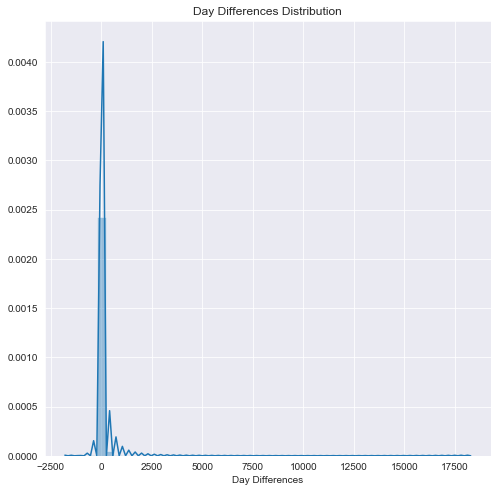

In [19]:
plt.figure(figsize = (8,8))
sns.distplot(tsa['Day Differences'].dropna())
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

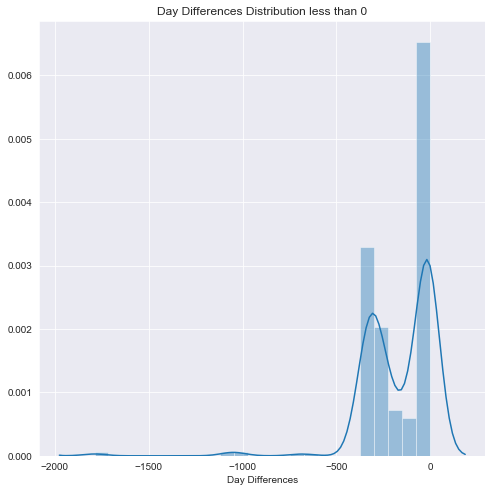

In [20]:
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] < 0]['Day Differences'].dropna())
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution more than 0')

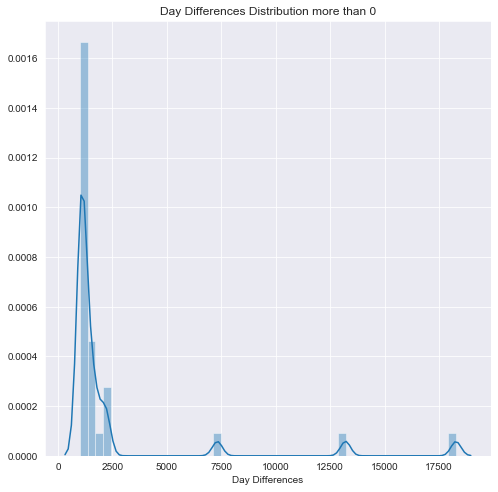

In [21]:
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] > 1000]['Day Differences'].dropna())
plt.title('Day Differences Distribution more than 0')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [22]:
tsa['Day Differences']

0       -333.0
1          4.0
2         42.0
3         40.0
4         10.0
         ...  
51061      3.0
51062      0.0
51063     63.0
51064     35.0
51065      2.0
Name: Day Differences, Length: 51066, dtype: float64

In [23]:
len(tsa[tsa['Day Differences'] < 0])

448

In [24]:
len(tsa[tsa['Day Differences'] > 1000])

30

In [25]:
x = ['Airport Name', 'Airline Name', 'Claim Amount', 'Close Amount', 'Disposition']
for i in x:
    print(i)
    print('\n')
    print('Less than 0 Day Differences')
    print('\n')
    print(tsa[tsa['Day Differences'] < 0][i].value_counts())
    print('\n')
    print('More than 1000 Day Differences')
    print('\n')
    print(tsa[tsa['Day Differences'] > 1000][i].value_counts())

Airport Name


Less than 0 Day Differences


Los Angeles International Airport       21
Newark International Airport            21
Chicago O'Hare International Airport    19
Miami International Airport             19
Phoenix Sky Harbor International        18
                                        ..
Daytona Beach International              1
Greater Binghamton Airport               1
Charlottesville / Albemarle              1
Meadows Field; Bakersfield Airport       1
Tallahassee Regional                     1
Name: Airport Name, Length: 116, dtype: int64


More than 1000 Day Differences


Hartsfield-Jackson Atlanta International Airport    3
Non TSA Airport (motor vehicle)                     2
Seattle-Tacoma International                        2
John F. Kennedy International                       2
San Francisco International                         1
Minneapolis/ St.Paul International Airport          1
Kileen - Ft. Hood Regional                          1
Ft. Lauderdale-Hollywoo

#### Based on the data above, I can see that tha amount of claims under 'more than 1000 days' have a much less numbers compared to 'less than 0 days', 30 to 448. When I am trying to look for the Airport Name, EWR and LAX lead the 'less than 0 days' category with 21 claims. EWR currently ranks in 14 in the Busiest Airports in the US ranking, while LAX ranks just a couple under the top, which is 3rd rank. What is interesting is that the current holder of the Busiest Airport in the US, ATL, have the most claims under the 'more than 1000 days' category. (taken from https://www.tripsavvy.com/busiest-airports-in-the-usa-3301020). 
#### When I try to look from the claim amount, the majority of data in which categorized into the 'less than 0 days', have 50 USD and 0 USD. While the majority of data in 'more than 1000 days', have a much bigger amount than 'less than 0 days', which are 100 USD and 800 USD. Other than than, while I try to look from the Disposition perspective, both of the categories have Deny as the most common disposition.
#### Another reason why there are Days Differences that less than 0, is error while inputting the data.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [26]:
tsa['Claim Amount'] = tsa['Claim Amount'].apply(lambda x: float(re.sub('[;]','',re.sub('[$]', '', x))) if not pd.isna(x) else x)
tsa['Close Amount'] = tsa['Close Amount'].apply(lambda x: float(re.sub('[;]','',re.sub('[$]', '', x))) if not pd.isna(x) else x)

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [27]:
tsa['Amount Differences'] = tsa['Claim Amount'] - tsa['Close Amount']

In [28]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Claim Number        51066 non-null  object        
 1   Date Received       50996 non-null  datetime64[ns]
 2   Incident Date       50496 non-null  datetime64[ns]
 3   Airport Code        48915 non-null  object        
 4   Airport Name        48915 non-null  object        
 5   Airline Name        41470 non-null  object        
 6   Claim Type          49035 non-null  object        
 7   Claim Site          50817 non-null  object        
 8   Item                48918 non-null  object        
 9   Claim Amount        46886 non-null  float64       
 10  Status              47877 non-null  object        
 11  Close Amount        33786 non-null  float64       
 12  Disposition         32846 non-null  object        
 13  Day Differences     50460 non-null  float64   

In [29]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


In [30]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,NaN
51065,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN,2.0,NaN


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

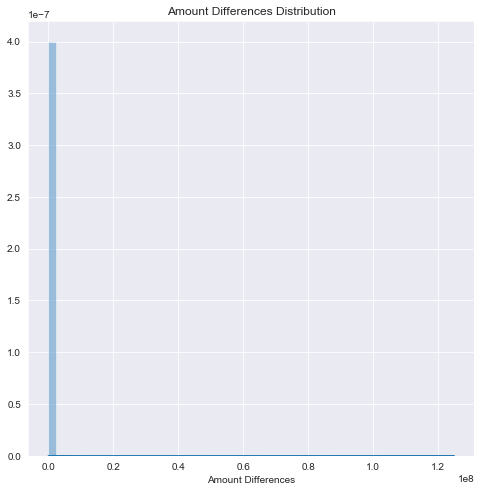

In [31]:
plt.figure(figsize = (8,8))
sns.distplot(tsa['Amount Differences'].dropna())
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [32]:
q1_ad = tsa['Amount Differences'].describe()['25%']
q3_ad = tsa['Amount Differences'].describe()['75%']
iqr = q3_ad - q1_ad

In [33]:
outlier_ad = tsa[(tsa['Amount Differences'] > q3_ad + (1.5 * iqr))]
not_outlier_ad = tsa[(tsa['Amount Differences'] < q3_ad + (1.5 * iqr))]

In [34]:
outlier_ad

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [35]:
outlier_ad['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [36]:
outlier_ad['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

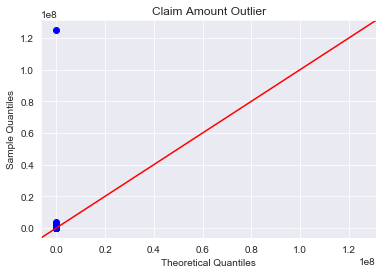

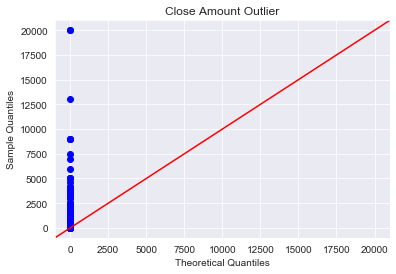

In [37]:
sm.qqplot(outlier_ad['Claim Amount'], line = '45')
plt.title('Claim Amount Outlier')
sm.qqplot(outlier_ad['Close Amount'], line = '45')
plt.title('Close Amount Outlier')
pylab.show()

In [38]:
from scipy.stats import shapiro, normaltest,anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1],
    'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [39]:
try_normal(outlier_ad['Claim Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1559.8322253694841},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [40]:
try_normal(outlier_ad['Close Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1244.9229604344491},
 'Shapiro': 0.0,
 'K^2': 0.0}

Based on the analysis above, using qqplot and try_normal, I can see that Claim Amount and Close Amount unfer the outlier data are not normally distributed.

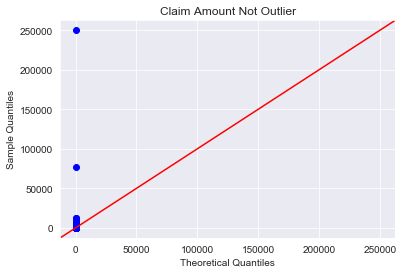

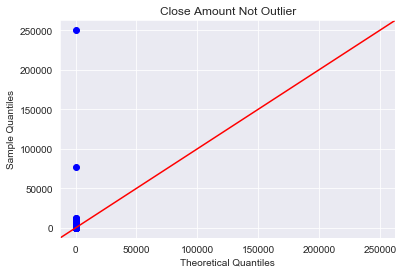

In [41]:
sm.qqplot(not_outlier_ad['Claim Amount'], line = '45')
plt.title('Claim Amount Not Outlier')
sm.qqplot(not_outlier_ad['Close Amount'], line = '45')
plt.title('Close Amount Not Outlier')
pylab.show()

Just like the outlier data above, Claim Amount and Close Amount under the non-outlier data are also not normally distributed.

In [42]:
try_normal(not_outlier_ad['Claim Amount'])

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 8143.945700461125},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [43]:
try_normal(not_outlier_ad['Close Amount'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 9608.55090549215},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [44]:
from scipy.stats import levene, bartlett, kruskal

In [45]:
levene(outlier_ad['Claim Amount'], outlier_ad['Close Amount'])

LeveneResult(statistic=1.7423510662913355, pvalue=0.18687803519500246)

p-value di atas alpha level 0,05, H0 diterima = Equal Variance

In [46]:
mannwhitneyu(outlier_ad['Claim Amount'], outlier_ad['Close Amount'])

MannwhitneyuResult(statistic=261430.5, pvalue=0.0)

In [47]:
levene(not_outlier_ad['Claim Amount'], not_outlier_ad['Close Amount'])

LeveneResult(statistic=43.38534655894072, pvalue=4.5332568966792385e-11)

p-value di bawah alpha level 0,05, H0 ditolak = Not Equal Variance

In [48]:
mannwhitneyu(not_outlier_ad['Claim Amount'], not_outlier_ad['Close Amount'])

MannwhitneyuResult(statistic=173994833.0, pvalue=0.0)

In [49]:
claim_close = len(tsa[tsa['Claim Amount'] > tsa['Close Amount']])
close_claim = len(tsa[tsa['Claim Amount'] < tsa['Close Amount']])

In [50]:
print('Claim Amount > Close Amount')
print(claim_close)

Claim Amount > Close Amount
24684


In [51]:
print('Claim Amount < Close Amount')
print(close_claim)

Claim Amount < Close Amount
111


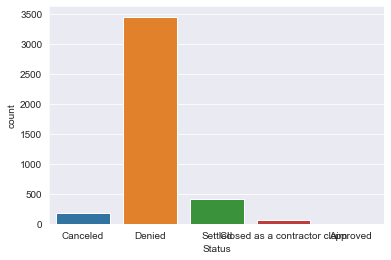

In [52]:
sns.countplot(outlier_ad['Status'])

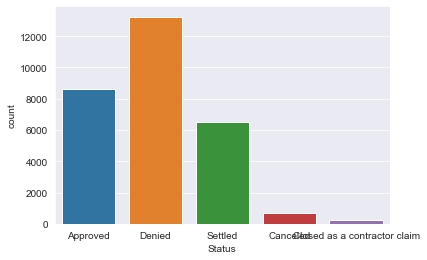

In [53]:
sns.countplot(not_outlier_ad['Status'])

#### Based on the analysis above, I agree with your assumption, I found that a lot of people tend to request for bigger money than what it should be. Other than that, the chart above proves that most of the claims, either outlier or not outlier, are mostly Denied.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

In [54]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


In [55]:
tsa['Airport Name'].value_counts()

John F. Kennedy International           2286
Los Angeles International Airport       1813
Newark International Airport            1747
Chicago O'Hare International Airport    1712
Orlando International Airport           1633
                                        ... 
Crescent City                              1
Hickory Regional Airport                   1
Altoona Blair County                       1
Eastern Oregon Regional                    1
Gustavus                                   1
Name: Airport Name, Length: 418, dtype: int64

In [56]:
tsa['Airline Name'].value_counts()

American Airlines           4377
Delta Air Lines             4371
UAL                         3507
Southwest Airlines          3258
Continental Airlines        2363
                            ... 
Arika Isreali Airlines         1
SonAir                         1
Britannia Airways Ltd          1
Big Sky Airlines               1
Aero California                1
Name: Airline Name, Length: 242, dtype: int64

In [57]:
tsa['Claim Type'].value_counts()

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

In [58]:
tsa.groupby('Airport Name').count().sort_values(by = 'Claim Number', ascending = False).head(20)

,Claim Number,Date Received,Incident Date,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Airport Name,,,,,,,,,,,,,,
John F. Kennedy International,2286,2285,2282,2286,2019,2233,2281,2174,2025,2050,1258,1250,2281,1253
Los Angeles International Airport,1813,1811,1798,1813,1370,1714,1808,1779,1733,1769,1613,1586,1796,1602
Newark International Airport,1747,1747,1737,1747,1500,1676,1736,1681,1616,1638,1178,1177,1737,1173
Chicago O'Hare International Airport,1712,1712,1704,1712,1439,1652,1706,1650,1593,1620,1209,1199,1704,1201
Orlando International Airport,1633,1630,1631,1633,1408,1592,1624,1561,1531,1546,970,956,1628,967
Miami International Airport,1613,1612,1607,1613,1356,1548,1607,1548,1437,1462,1028,1023,1606,1023
Hartsfield-Jackson Atlanta International Airport,1525,1523,1519,1525,1331,1490,1524,1455,1360,1384,917,917,1517,912
Seattle-Tacoma International,1330,1329,1323,1330,1088,1286,1330,1294,1230,1248,920,905,1323,913
McCarran International,1278,1278,1272,1278,1086,1242,1273,1231,1211,1230,873,866,1272,868


In [59]:
tsa.groupby('Airline Name').count().sort_values(by = 'Claim Number', ascending = False).head(20)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Airline Name,,,,,,,,,,,,,,
American Airlines,4377,4369,4361,4293,4293,4211,4368,4244,4226,4285,3891,3796,4353,3881
Delta Air Lines,4371,4370,4355,4287,4287,4210,4364,4228,4212,4281,3845,3752,4354,3830
UAL,3507,3506,3498,3447,3447,3385,3499,3387,3394,3444,3061,2923,3497,3049
Southwest Airlines,3258,3254,3247,3220,3220,3169,3250,3113,3132,3175,2750,2698,3243,2739
Continental Airlines,2363,2363,2356,2319,2319,2285,2356,2312,2328,2363,2261,2217,2356,2257
USAir,2359,2357,2349,2298,2298,2270,2352,2299,2304,2336,2130,2091,2347,2123
Northwest Airlines,2311,2311,2303,2239,2239,2222,2305,2261,2273,2311,2214,2151,2303,2203
Delta Air Lines,2074,2074,2074,2070,2070,2070,2074,1930,1672,1672,0,0,2074,0
Southwest Airlines,1899,1899,1899,1899,1899,1896,1896,1757,1519,1519,0,0,1899,0


In [60]:
tsa.groupby('Claim Type').count().sort_values(by = 'Claim Number', ascending = False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Claim Type,,,,,,,,,,,,,,
Passenger Property Loss,29713,29696,29602,29013,29013,25664,29647,28658,27412,27778,19591,18862,29586,19518
Property Damage,18590,18572,18514,17711,17711,14313,18547,17965,17335,17510,12222,12108,18496,12184
Personal Injury,394,394,393,385,385,282,387,157,283,310,190,176,393,178
Passenger Theft,115,115,115,115,115,89,115,114,115,115,108,108,115,108
Employee Loss (MPCECA),114,114,114,113,113,78,113,106,108,109,102,98,114,101
Motor Vehicle,96,96,96,82,82,7,96,39,70,71,38,34,96,38
Complaint,13,13,13,12,12,9,11,2,5,5,0,0,13,0


In [61]:
import pingouin

In [62]:
import scipy.stats as ss

#Correlation measurement untuk data discrete dan continuous
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

#Correlation measurement untuk data discrete dan discrete
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [63]:
cramers_v(tsa['Airport Name'], tsa['Claim Type'])

0.2522217766994018

In [64]:
cramers_v(tsa['Airline Name'], tsa['Claim Type'])

0.04264088575901359

In [65]:
from scipy.stats import chi2_contingency
pd.crosstab(tsa['Airport Name'], tsa['Claim Type'])

Claim Type,Complaint,Employee Loss (MPCECA),Motor Vehicle,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage
Airport Name,,,,,,,
Albert J Ellis; Jacksonville,0,0,0,1,0,0,1
Aberdeen Regional Airport,0,2,0,3,0,0,3
Abilene Regional,0,0,0,4,0,0,6
Abraham Lincoln Capital Airport; Springfield,0,0,0,3,0,0,1
Adak Mitchell Field Airport,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
Yeager; Charleston,0,0,0,9,0,0,9
Yellowstone,0,0,0,1,0,0,0
Yellowstone Regional,0,0,0,2,0,0,1


In [66]:
chi2_contingency(pd.crosstab(tsa['Airport Name'], tsa['Claim Type']))

(20597.93547834688,
 0.0,
 2496,
 array([[5.05998187e-04, 4.76481626e-03, 3.45765428e-03, ...,
         4.84914929e-03, 1.62341085e-02, 7.46811157e-01],
        [2.02399275e-03, 1.90592650e-02, 1.38306171e-02, ...,
         1.93965972e-02, 6.49364340e-02, 2.98724463e+00],
        [2.52999093e-03, 2.38240813e-02, 1.72882714e-02, ...,
         2.42457465e-02, 8.11705425e-02, 3.73405579e+00],
        ...,
        [7.58997280e-04, 7.14722439e-03, 5.18648142e-03, ...,
         7.27372394e-03, 2.43511627e-02, 1.12021674e+00],
        [1.01199637e-03, 9.52963252e-03, 6.91530855e-03, ...,
         9.69829858e-03, 3.24682170e-02, 1.49362231e+00],
        [1.77099365e-03, 1.66768569e-02, 1.21017900e-02, ...,
         1.69720225e-02, 5.68193797e-02, 2.61383905e+00]]))

In [67]:
from scipy.stats import chi2_contingency
pd.crosstab(tsa['Airline Name'], tsa['Claim Type'])

Claim Type,Complaint,Employee Loss (MPCECA),Motor Vehicle,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage
Airline Name,,,,,,,
ATA Aerocondor,0,1,0,86,0,0,22
Aer Lingus,0,0,0,16,0,1,9
Aero California,0,0,0,0,0,0,1
Aero Flot,0,0,0,13,0,0,1
Aero Mexico,0,0,0,24,0,0,16
...,...,...,...,...,...,...,...
Western Pacific Airlines Inc Westpac,0,0,0,0,0,0,3
Westjet Airlines Ltd,0,0,0,17,0,1,13
Westjet Airlines Ltd,0,0,0,24,0,0,26


In [68]:
chi2_contingency(pd.crosstab(tsa['Airline Name'], tsa['Claim Type']))

(1875.1708199222526,
 2.526518540228712e-14,
 1434,
 array([[2.42569606e-02, 2.10226992e-01, 1.88665249e-02, ...,
         2.39874388e-01, 7.60051432e-01, 3.85766530e+01],
        [5.78606399e-03, 5.01458879e-02, 4.50027199e-03, ...,
         5.72177439e-02, 1.81296672e-01, 9.20177044e+00],
        [2.22540923e-04, 1.92868800e-03, 1.73087384e-04, ...,
         2.20068246e-03, 6.97294891e-03, 3.53914248e-01],
        ...,
        [1.11270461e-02, 9.64343999e-02, 8.65436922e-03, ...,
         1.10034123e-01, 3.48647446e-01, 1.76957124e+01],
        [2.22540923e-04, 1.92868800e-03, 1.73087384e-04, ...,
         2.20068246e-03, 6.97294891e-03, 3.53914248e-01],
        [2.22540923e-04, 1.92868800e-03, 1.73087384e-04, ...,
         2.20068246e-03, 6.97294891e-03, 3.53914248e-01]]))

Based on the analysis about the correlation between Airport Name, Airline Name and Claim Type with Cramer's V and Chi Squared, I can see that Airport Name and Claim Type have a correlation about 0.2522217766994018 on Cramer's V and 20597.93547834688 on Chi Squared. Meanwhile, Airline Name and Claim Type have correlation about 0.04264088575901359 on Cramer's V and 1875.1708199222526 on Chi Squared. This means that Airport Name has a bigger correlation to Claim Type compared to Airline Name.


In [69]:
tsa[tsa['Claim Type'].isna()].head(20)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,42.0,200.00
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,35.0,0.00
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44.0,3.01
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.00,Denied,0.00,Deny,39.0,150.00
11,0616760L,2002-09-26,NaT,NaN,NaN,NaN,NaN,Other,Locks,NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN
13,19133,2002-10-02,2002-08-22,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
16,19078,2002-10-17,2002-09-12,SAT,San Antonio International,Southwest Airlines,NaN,Other,Computer - Laptop,30.00,Approved,NaN,Approve in Full,35.0,NaN
18,20937,2002-10-17,2002-08-12,MOB,Mobile Regional,NaN,NaN,Checked Baggage,Cameras - Digital,382.99,Denied,382.99,Deny,66.0,0.00
19,0616788L,2002-10-17,NaT,NaN,NaN,NaN,NaN,Other,Luggage (all types including footlockers),NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN
22,21051,2002-10-21,2002-10-03,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Other,Cell Phones,75.00,Approved,NaN,Approve in Full,18.0,NaN


In [70]:
sum(tsa['Claim Type'].isna())

2031

In [71]:
tsa[tsa['Claim Type'].isna()]['Claim Site'].value_counts()[:5]

Checked Baggage    1203
Other               436
Checkpoint          257
Motor Vehicle         5
Name: Claim Site, dtype: int64

In [72]:
tsa[tsa['Claim Type'].isna()]['Item'].value_counts()[:5]

Other                                         563
Luggage (all types including footlockers)     268
Clothing - Shoes; belts; accessories; etc.    257
Jewelry - Fine                                192
Cameras - Digital                             145
Name: Item, dtype: int64

In [73]:
tsa[tsa['Claim Type'].isna()]['Airport Name'].value_counts()[:5]

Los Angeles International Airport       99
Newark International Airport            71
Miami International Airport             65
Chicago O'Hare International Airport    60
John F. Kennedy International           53
Name: Airport Name, dtype: int64

In [74]:
tsa[tsa['Claim Type'].isna()]['Airline Name'].value_counts()[:5]

American Airlines     166
Delta Air Lines       161
UAL                   122
USAir                  89
Northwest Airlines     89
Name: Airline Name, dtype: int64

#### As the data stated above, on the Item column, Other is the most found nan in Claim Type category with 563. Based on that, I assume that the 'inputters' forgot or did not know what type of things that about to be claimed. The most reported case found based on Claim Type in Airport Named is LAX, while in Airline Name is American Airlines.

#### 2. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [75]:
tsa['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Closed as a contractor claim', 'In review', 'Claim entered',
       'Deny', nan, 'Settle', 'Approve in Full'], dtype=object)

In [76]:
tsa['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

In [77]:
for i in  tsa['Status'].unique():
    print('Status: {}'.format(i))
    print(tsa[tsa['Status'] == i]['Disposition'].value_counts())
    print('\n')

Status: Approved
Approve in Full    8724
Name: Disposition, dtype: int64


Status: Canceled
Settle             2
Deny               2
Approve in Full    1
Name: Disposition, dtype: int64


Status: Denied
Deny    17125
Name: Disposition, dtype: int64


Status: Settled
Settle    6970
Name: Disposition, dtype: int64


Status: In litigation
Deny               15
Approve in Full     1
Name: Disposition, dtype: int64


Status: Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.
Deny               4
Approve in Full    1
Name: Disposition, dtype: int64


Status: Closed as a contractor claim
Series([], Name: Disposition, dtype: int64)


Status: In review
Deny    1
Name: Disposition, dtype: int64


Status: Claim entered
Series([], Name: Disposition, dtype: int64)


Status: Deny
Series([], Name: Disposition, dtype: int64)


Status: nan
Series([], Name: Disposition, dtype: int64)


Status: Settle
Series([], Name: Disposition

I see that if Status if Approved, the Disposition would be Approve in Full. While the Status is Denied, the Disposition would be Deny. Settled in Status, Settle in Disposition.

In [78]:
tsa.groupby('Disposition').count()['Status']

Disposition
Approve in Full     8727
Deny               17147
Settle              6972
Name: Status, dtype: int64

In [79]:
tsa.groupby('Status').count()['Disposition']

Status
Approve in Full                                                                                                                      0
Approved                                                                                                                          8724
Canceled                                                                                                                             5
Claim entered                                                                                                                        0
Closed as a contractor claim                                                                                                         0
Denied                                                                                                                           17125
Deny                                                                                                                                 0
In litigation                                   

In [80]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Status']))

(65671.16926057872,
 0.0,
 12,
 array([[2.31791841e+03, 1.32847226e+00, 4.55001751e+03, 4.25111125e+00,
         2.65694453e-01, 1.32847226e+00, 1.85189034e+03],
        [4.55429666e+03, 2.61021129e+00, 8.93997366e+03, 8.35267612e+00,
         5.22042258e-01, 2.61021129e+00, 3.63863454e+03],
        [1.85178494e+03, 1.06131645e+00, 3.63500883e+03, 3.39621263e+00,
         2.12263289e-01, 1.06131645e+00, 1.47947513e+03]]))

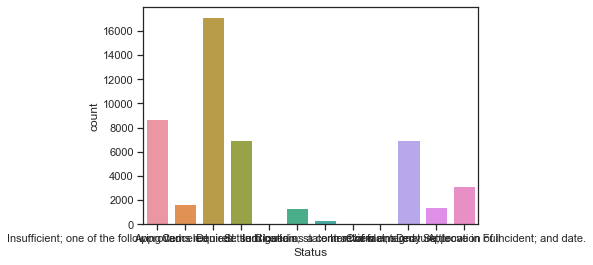

In [81]:
sns.countplot(tsa['Status'])

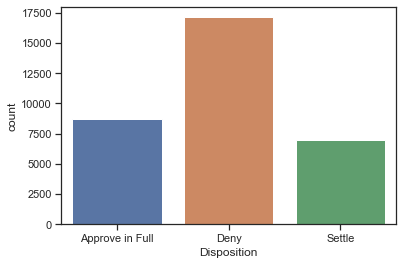

In [82]:
sns.countplot(tsa['Disposition'])

As you can see above, most of the Status and the Disposition is Denied or Deny. While Approve or Approve in full came in second, and settle is third. 

In [83]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

In [84]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Claim Number']))

(65692.00000000001,
 0.4970650091602107,
 65690,
 array([[0.26569445, 0.26569445, 0.26569445, ..., 0.26569445, 0.26569445,
         0.26569445],
        [0.52204226, 0.52204226, 0.52204226, ..., 0.52204226, 0.52204226,
         0.52204226],
        [0.21226329, 0.21226329, 0.21226329, ..., 0.21226329, 0.21226329,
         0.21226329]]))

In [85]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Claim Number']))

(526647.0,
 0.49546503081409593,
 526636,
 array([[0.0661069 , 0.0661069 , 0.0661069 , ..., 0.0661069 , 0.0661069 ,
         0.0661069 ],
        [0.18221693, 0.18221693, 0.18221693, ..., 0.18221693, 0.18221693,
         0.18221693],
        [0.03567475, 0.03567475, 0.03567475, ..., 0.03567475, 0.03567475,
         0.03567475],
        ...,
        [0.02834346, 0.02834346, 0.02834346, ..., 0.02834346, 0.02834346,
         0.02834346],
        [0.0303486 , 0.0303486 , 0.0303486 , ..., 0.0303486 , 0.0303486 ,
         0.0303486 ],
        [0.14558139, 0.14558139, 0.14558139, ..., 0.14558139, 0.14558139,
         0.14558139]]))

In [86]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Date Received']))

(8006.22750979959,
 0.0,
 3680,
 array([[0.265665  , 0.265665  , 0.265665  , ..., 0.53133   , 0.265665  ,
         0.265665  ],
        [0.52230891, 0.52230891, 0.52230891, ..., 1.04461782, 0.52230891,
         0.52230891],
        [0.21202609, 0.21202609, 0.21202609, ..., 0.42405218, 0.21202609,
         0.21202609]]))

In [87]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Date Received']))

(104230.46234358936,
 0.0,
 34300,
 array([[0.06620231, 0.06620231, 0.06620231, ..., 0.06620231, 0.06620231,
         0.06620231],
        [0.18227075, 0.18227075, 0.18227075, ..., 0.18227075, 0.18227075,
         0.18227075],
        [0.03511965, 0.03511965, 0.03511965, ..., 0.03511965, 0.03511965,
         0.03511965],
        ...,
        [0.0283007 , 0.0283007 , 0.0283007 , ..., 0.0283007 , 0.0283007 ,
         0.0283007 ],
        [0.0303924 , 0.0303924 , 0.0303924 , ..., 0.0303924 , 0.0303924 ,
         0.0303924 ],
        [0.14547774, 0.14547774, 0.14547774, ..., 0.14547774, 0.14547774,
         0.14547774]]))

In [88]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Incident Date']))

(10051.309884541433,
 2.3186705927385934e-196,
 6126,
 array([[0.53054721, 0.26527361, 0.26527361, ..., 0.53054721, 0.26527361,
         0.26527361],
        [1.04559103, 0.52279551, 0.52279551, ..., 1.04559103, 0.52279551,
         0.52279551],
        [0.42386176, 0.21193088, 0.21193088, ..., 0.42386176, 0.21193088,
         0.21193088]]))

In [89]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Incident Date']))

(146403.76495879787,
 0.0,
 105886,
 array([[0.13380401, 0.066902  , 0.066902  , ..., 0.066902  , 0.066902  ,
         0.066902  ],
        [0.36590006, 0.18295003, 0.18295003, ..., 0.18295003, 0.18295003,
         0.18295003],
        [0.066289  , 0.0331445 , 0.0331445 , ..., 0.0331445 , 0.0331445 ,
         0.0331445 ],
        ...,
        [0.04815253, 0.02407627, 0.02407627, ..., 0.02407627, 0.02407627,
         0.02407627],
        [0.06142724, 0.03071362, 0.03071362, ..., 0.03071362, 0.03071362,
         0.03071362],
        [0.29233956, 0.14616978, 0.14616978, ..., 0.14616978, 0.14616978,
         0.14616978]]))

In [90]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Airport Code']))

(1326.2685852362222,
 5.191337968663722e-39,
 716,
 array([[ 5.80893837,  1.32021327, 41.45469657, ...,  1.05617061,
          0.26404265,  2.37638388],
        [11.60890701,  2.63838796, 82.84538184, ...,  2.11071037,
          0.52767759,  4.74909832],
        [ 4.58215462,  1.04139878, 32.69992159, ...,  0.83311902,
          0.20827976,  1.8745178 ]]))

In [91]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Airport Code']))

(40032.54937676439,
 0.0,
 3950,
 array([[2.07196788e+00, 5.52524768e-01, 1.45037751e+01, ...,
         4.14393576e-01, 3.10795182e+00, 6.90655959e-02],
        [5.50953607e+00, 1.46920962e+00, 3.85667525e+01, ...,
         1.10190721e+00, 8.26430411e+00, 1.83651202e-01],
        [9.07345175e-01, 2.41958713e-01, 6.35141623e+00, ...,
         1.81469035e-01, 1.36101776e+00, 3.02448392e-02],
        ...,
        [3.91480819e-01, 1.04394885e-01, 2.74036573e+00, ...,
         7.82961637e-02, 5.87221228e-01, 1.30493606e-02],
        [9.51206739e-01, 2.53655130e-01, 6.65844717e+00, ...,
         1.90241348e-01, 1.42681011e+00, 3.17068913e-02],
        [4.34622267e+00, 1.15899271e+00, 3.04235587e+01, ...,
         8.69244534e-01, 6.51933400e+00, 1.44874089e-01]]))

In [92]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Airport Name']))

(1326.2685852362224,
 5.19133796866254e-39,
 716,
 array([[1.05617061, 1.32021327, 1.05617061, ..., 3.9606398 , 0.26404265,
         0.26404265],
        [2.11071037, 2.63838796, 2.11071037, ..., 7.91516387, 0.52767759,
         0.52767759],
        [0.83311902, 1.04139878, 0.83311902, ..., 3.12419633, 0.20827976,
         0.20827976]]))

In [93]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Airport Name']))

(45393.98452414171,
 0.0,
 4090,
 array([[0.0690656 , 0.48345917, 0.55252477, ..., 0.20719679, 0.20719679,
         0.41439358],
        [0.1836512 , 1.28555842, 1.46920962, ..., 0.55095361, 0.55095361,
         1.10190721],
        [0.03024484, 0.21171387, 0.24195871, ..., 0.09073452, 0.09073452,
         0.18146904],
        ...,
        [0.01304936, 0.09134552, 0.10439488, ..., 0.03914808, 0.03914808,
         0.07829616],
        [0.03170689, 0.22194824, 0.25365513, ..., 0.09512067, 0.09512067,
         0.19024135],
        [0.14487409, 1.01411862, 1.15899271, ..., 0.43462227, 0.43462227,
         0.86924453]]))

In [94]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Airline Name']))

(462.0784895520396,
 1.9075856883808412e-10,
 286,
 array([[2.44843738e+01, 3.87871268e+00, 2.42419542e-01, 4.84839085e-01,
         4.36355176e+00, 7.27258627e-01, 2.42419542e-01, 2.42419542e-01,
         3.12721210e+01, 9.69678170e-01, 1.93935634e+01, 1.45451725e+00,
         2.42419542e-01, 5.33322993e+00, 1.45451725e+00, 9.69678170e-01,
         4.84839085e-01, 2.42419542e-01, 6.35139201e+01, 1.29694455e+02,
         2.47025514e+02, 7.03016673e+00, 7.27258627e-01, 2.42419542e-01,
         2.88479256e+01, 2.10905002e+01, 1.16361380e+01, 8.36347421e+01,
         9.20224583e+02, 4.84839085e-01, 1.86663048e+01, 2.32722761e+01,
         2.42419542e-01, 1.21209771e+00, 3.15145405e+00, 2.42419542e-01,
         1.45451725e+00, 7.27258627e-01, 2.42419542e-01, 1.45451725e+00,
         2.42419542e-01, 3.78174486e+01, 4.84839085e-01, 2.42419542e-01,
         2.42419542e-01, 1.21209771e+00, 1.69693680e+00, 4.84839085e-01,
         9.69678170e-01, 4.12113222e+00, 1.45451725e+00, 2.42419542e-01,


In [95]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Airline Name']))

(32454.138476581356,
 0.0,
 2350,
 array([[8.22307413e+00, 1.56985961e+00, 7.47552194e-02, ...,
         2.16790136e+00, 3.36398487e+00, 7.47552194e-02],
        [1.78052634e+01, 3.39918665e+00, 1.61866031e-01, ...,
         4.69411490e+00, 7.28397140e+00, 1.61866031e-01],
        [3.04874890e+00, 5.82033881e-01, 2.77158991e-02, ...,
         8.03761073e-01, 1.24721546e+00, 2.77158991e-02],
        ...,
        [1.65259286e+00, 3.15495001e-01, 1.50235715e-02, ...,
         4.35683573e-01, 6.76060716e-01, 1.50235715e-02],
        [3.82660726e+00, 7.30534114e-01, 3.47873388e-02, ...,
         1.00883282e+00, 1.56543024e+00, 3.47873388e-02],
        [1.44829819e+01, 2.76493291e+00, 1.31663472e-01, ...,
         3.81824069e+00, 5.92485624e+00, 1.31663472e-01]]))

In [96]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Airline Name']))

(462.0784895520396,
 1.9075856883808412e-10,
 286,
 array([[2.44843738e+01, 3.87871268e+00, 2.42419542e-01, 4.84839085e-01,
         4.36355176e+00, 7.27258627e-01, 2.42419542e-01, 2.42419542e-01,
         3.12721210e+01, 9.69678170e-01, 1.93935634e+01, 1.45451725e+00,
         2.42419542e-01, 5.33322993e+00, 1.45451725e+00, 9.69678170e-01,
         4.84839085e-01, 2.42419542e-01, 6.35139201e+01, 1.29694455e+02,
         2.47025514e+02, 7.03016673e+00, 7.27258627e-01, 2.42419542e-01,
         2.88479256e+01, 2.10905002e+01, 1.16361380e+01, 8.36347421e+01,
         9.20224583e+02, 4.84839085e-01, 1.86663048e+01, 2.32722761e+01,
         2.42419542e-01, 1.21209771e+00, 3.15145405e+00, 2.42419542e-01,
         1.45451725e+00, 7.27258627e-01, 2.42419542e-01, 1.45451725e+00,
         2.42419542e-01, 3.78174486e+01, 4.84839085e-01, 2.42419542e-01,
         2.42419542e-01, 1.21209771e+00, 1.69693680e+00, 4.84839085e-01,
         9.69678170e-01, 4.12113222e+00, 1.45451725e+00, 2.42419542e-01,


In [97]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Airline Name']))

(32454.138476581356,
 0.0,
 2350,
 array([[8.22307413e+00, 1.56985961e+00, 7.47552194e-02, ...,
         2.16790136e+00, 3.36398487e+00, 7.47552194e-02],
        [1.78052634e+01, 3.39918665e+00, 1.61866031e-01, ...,
         4.69411490e+00, 7.28397140e+00, 1.61866031e-01],
        [3.04874890e+00, 5.82033881e-01, 2.77158991e-02, ...,
         8.03761073e-01, 1.24721546e+00, 2.77158991e-02],
        ...,
        [1.65259286e+00, 3.15495001e-01, 1.50235715e-02, ...,
         4.35683573e-01, 6.76060716e-01, 1.50235715e-02],
        [3.82660726e+00, 7.30534114e-01, 3.47873388e-02, ...,
         1.00883282e+00, 1.56543024e+00, 3.47873388e-02],
        [1.44829819e+01, 2.76493291e+00, 1.31663472e-01, ...,
         3.81824069e+00, 5.92485624e+00, 1.31663472e-01]]))

In [98]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Claim Type']))

(579.8368357741806,
 3.6722772776149827e-118,
 10,
 array([[2.59160135e+01, 8.99126999e+00, 4.98803925e+03, 2.85605047e+01,
         4.65430447e+01, 3.20194991e+03],
        [5.19194545e+01, 1.80128720e+01, 9.99290563e+03, 5.72173581e+01,
         9.32431020e+01, 6.41470159e+03],
        [2.01645320e+01, 6.99585803e+00, 3.88105512e+03, 2.22221373e+01,
         3.62138533e+01, 2.49134850e+03]]))

In [99]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Claim Type']))

(2805.917755457185,
 0.0,
 60,
 array([[3.44350516e-01, 7.50684126e+00, 4.88977733e+00, 1.91307373e+03,
         7.92006188e+00, 2.13497320e+01, 1.20591551e+03],
        [9.03852020e-01, 1.97039740e+01, 1.28346987e+01, 5.02144028e+03,
         2.07885965e+01, 5.60388252e+01, 3.16528977e+03],
        [1.55017648e-01, 3.37938472e+00, 2.20125060e+00, 8.61216044e+02,
         3.56540590e+00, 9.61109417e+00, 5.42871803e+02],
        [3.48599067e-02, 7.59945967e-01, 4.95010676e-01, 1.93667698e+02,
         8.01777855e-01, 2.16131422e+00, 1.22079393e+02],
        [1.80999172e+00, 3.94578195e+01, 2.57018824e+01, 1.00555900e+04,
         4.16298096e+01, 1.12219487e+02, 6.33859101e+03],
        [7.62451523e-01, 1.66214432e+01, 1.08268116e+01, 4.23587568e+03,
         1.75363850e+01, 4.72719944e+01, 2.67010523e+03],
        [2.72343021e-03, 5.93707787e-02, 3.86727091e-02, 1.51302889e+01,
         6.26388949e-02, 1.68852673e-01, 9.53745261e+00],
        [3.26811626e-04, 7.12449344e-03, 4.64072509e

In [100]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Claim Site']))

(444.9018661146153,
 6.139462148789535e-93,
 6,
 array([[7.03656384e+03, 1.57431091e+03, 1.16930587e+01, 8.74321892e+01],
        [1.38146087e+04, 3.09078261e+03, 2.29565217e+01, 1.71652174e+02],
        [5.62682746e+03, 1.25890648e+03, 9.35041953e+00, 6.99156369e+01]]))

In [101]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Claim Site']))

(3094.665192717607,
 0.0,
 40,
 array([[1.32732040e-01, 2.50080436e+03, 6.11761972e+02, 6.37113791e+00,
         4.49297955e+01],
        [3.65264814e-01, 6.88195436e+03, 1.68350553e+03, 1.75327111e+01,
         1.23642139e+02],
        [6.94284216e-02, 1.30810089e+03, 3.19995595e+02, 3.33256424e+00,
         2.35015207e+01],
        [1.36339801e-02, 2.56877819e+02, 6.28390142e+01, 6.54431044e-01,
         4.61510225e+00],
        [7.16895648e-01, 1.35070309e+04, 3.30417204e+03, 3.44109911e+01,
         2.42669177e+02],
        [2.93571054e-01, 5.53117223e+03, 1.35306899e+03, 1.40914106e+01,
         9.93738018e+01],
        [1.00681699e-03, 1.89694389e+01, 4.64041951e+00, 4.83272155e-02,
         3.40807551e-01],
        [8.39014158e-05, 1.58078658e+00, 3.86701626e-01, 4.02726796e-03,
         2.84006293e-02],
        [5.43261668e-02, 1.02355931e+03, 2.50389303e+02, 2.60765600e+00,
         1.83894074e+01],
        [6.09543786e-02, 1.14844145e+03, 2.80938731e+02, 2.92581017e+00,
     

In [102]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Item']))

(5238.130628974701,
 2.7660048850743675e-200,
 2472,
 array([[30.41680159,  0.26681405,  0.26681405, ..., 12.00663221,
          0.26681405,  0.26681405],
        [59.14397808,  0.51880683,  0.51880683, ..., 23.34630714,
          0.51880683,  0.51880683],
        [24.43922033,  0.21437913,  0.21437913, ...,  9.64706066,
          0.21437913,  0.21437913]]))

In [103]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Item']))

(65613.56223550875,
 0.0,
 19503,
 array([[ 7.70821064,  0.06318205,  0.06318205, ...,  2.9063745 ,
          0.06318205,  0.06318205],
        [22.6280097 ,  0.18547549,  0.18547549, ...,  8.53187251,
          0.18547549,  0.18547549],
        [ 4.22393037,  0.03462238,  0.03462238, ...,  1.59262948,
          0.03462238,  0.03462238],
        ...,
        [ 3.32842543,  0.02728218,  0.02728218, ...,  1.25498008,
          0.02728218,  0.02728218],
        [ 3.65862636,  0.02998874,  0.02998874, ...,  1.37948207,
          0.02998874,  0.02998874],
        [18.18482591,  0.14905595,  0.14905595, ...,  6.85657371,
          0.14905595,  0.14905595]]))

In [104]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Claim Amount']))

(26553.68061169203,
 4.552913137939611e-68,
 22648,
 array([[3.4507672 , 0.26544363, 0.26544363, ..., 0.26544363, 0.26544363,
         0.26544363],
        [6.79522832, 0.52270987, 0.52270987, ..., 0.52270987, 0.52270987,
         0.52270987],
        [2.75400447, 0.2118465 , 0.2118465 , ..., 0.2118465 , 0.2118465 ,
         0.2118465 ]]))

In [105]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Claim Amount']))

(223055.80258777417,
 0.0,
 132460,
 array([[4.76916884e+02, 1.35008318e-01, 6.75041590e-02, ...,
         6.75041590e-02, 6.75041590e-02, 6.75041590e-02],
        [1.30553172e+03, 3.69577273e-01, 1.84788636e-01, ...,
         1.84788636e-01, 1.84788636e-01, 1.84788636e-01],
        [2.16383142e+02, 6.12549588e-02, 3.06274794e-02, ...,
         3.06274794e-02, 3.06274794e-02, 3.06274794e-02],
        ...,
        [1.27479205e+02, 3.60875315e-02, 1.80437657e-02, ...,
         1.80437657e-02, 1.80437657e-02, 1.80437657e-02],
        [2.18944781e+02, 6.19801220e-02, 3.09900610e-02, ...,
         3.09900610e-02, 3.09900610e-02, 3.09900610e-02],
        [1.04198428e+03, 2.94970780e-01, 1.47485390e-01, ...,
         1.47485390e-01, 1.47485390e-01, 1.47485390e-01]]))

In [106]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Close Amount']))

(47838.0366692457,
 0.0,
 12004,
 array([[4.44088380e+03, 2.67732791e-01, 2.67732791e-01, ...,
         2.67732791e-01, 5.35465582e-01, 2.67732791e-01],
        [8.58277842e+03, 5.17440069e-01, 5.17440069e-01, ...,
         5.17440069e-01, 1.03488014e+00, 5.17440069e-01],
        [3.56333777e+03, 2.14827140e-01, 2.14827140e-01, ...,
         2.14827140e-01, 4.29654280e-01, 2.14827140e-01]]))

In [107]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Close Amount']))

(50064.105159555205,
 0.0,
 24032,
 array([[4.60474800e+03, 2.57147931e-01, 2.57147931e-01, ...,
         5.14295862e-01, 2.57147931e-01, 2.57147931e-01],
        [5.39552655e+02, 3.01308234e-02, 3.01308234e-02, ...,
         6.02616468e-02, 3.01308234e-02, 3.01308234e-02],
        [1.67483928e+02, 9.35298644e-03, 9.35298644e-03, ...,
         1.87059729e-02, 9.35298644e-03, 9.35298644e-03],
        [8.90102877e+03, 4.97069792e-01, 4.97069792e-01, ...,
         9.94139584e-01, 4.97069792e-01, 4.97069792e-01],
        [3.69418665e+03, 2.06298467e-01, 2.06298467e-01, ...,
         4.12596934e-01, 2.06298467e-01, 2.06298467e-01]]))

In [108]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Day Differences']))

(1823.341334349363,
 5.022648083836103e-08,
 1512,
 array([[0.26528046, 0.26528046, 0.26528046, ..., 0.26528046, 0.26528046,
         0.26528046],
        [0.5230472 , 0.5230472 , 0.5230472 , ..., 0.5230472 , 0.5230472 ,
         0.5230472 ],
        [0.21167234, 0.21167234, 0.21167234, ..., 0.21167234, 0.21167234,
         0.21167234]]))

In [109]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Day Differences']))

(15285.566748633992,
 0.0,
 8080,
 array([[0.06695295, 0.06695295, 0.06695295, ..., 0.06695295, 0.06695295,
         0.06695295],
        [0.18292012, 0.18292012, 0.18292012, ..., 0.18292012, 0.18292012,
         0.18292012],
        [0.03312743, 0.03312743, 0.03312743, ..., 0.03312743, 0.03312743,
         0.03312743],
        ...,
        [0.02407345, 0.02407345, 0.02407345, ..., 0.02407345, 0.02407345,
         0.02407345],
        [0.03073701, 0.03073701, 0.03073701, ..., 0.03073701, 0.03073701,
         0.03073701],
        [0.14596378, 0.14596378, 0.14596378, ..., 0.14596378, 0.14596378,
         0.14596378]]))

In [110]:
chi2_contingency(pd.crosstab(tsa['Disposition'], tsa['Amount Differences']))

(49715.29011485494,
 0.0,
 20340,
 array([[0.2675633 , 0.2675633 , 0.2675633 , ..., 0.80268989, 0.2675633 ,
         0.2675633 ],
        [0.51808237, 0.51808237, 0.51808237, ..., 1.55424711, 0.51808237,
         0.51808237],
        [0.21435433, 0.21435433, 0.21435433, ..., 0.643063  , 0.21435433,
         0.21435433]]))

In [111]:
chi2_contingency(pd.crosstab(tsa['Status'], tsa['Amount Differences']))

(74994.0523769276,
 0.0,
 41976,
 array([[0.25793248, 0.25793248, 0.25793248, ..., 0.77379743, 0.25793248,
         0.25793248],
        [0.02683   , 0.02683   , 0.02683   , ..., 0.08048999, 0.02683   ,
         0.02683   ],
        [0.00911264, 0.00911264, 0.00911264, ..., 0.02733791, 0.00911264,
         0.00911264],
        [0.49952196, 0.49952196, 0.49952196, ..., 1.49856588, 0.49952196,
         0.49952196],
        [0.20660293, 0.20660293, 0.20660293, ..., 0.61980878, 0.20660293,
         0.20660293]]))

#### Based on the analysis with Chi Squared above, the only column that has more value than the alpha level 0.05 is Claim Number. I got that from the correlation between Disposition and Claim Number with the value of 0.4970650091602107 and between Status and Claim Number with the value of 0.49546503081409593.

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [112]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


In [113]:
tsa['Airline Name'].head()

0     American Airlines
1                   NaN
2     American Airlines
3    Southwest Airlines
4                   NaN
Name: Airline Name, dtype: object

Text(0.5, 1.0, 'Airline Name')

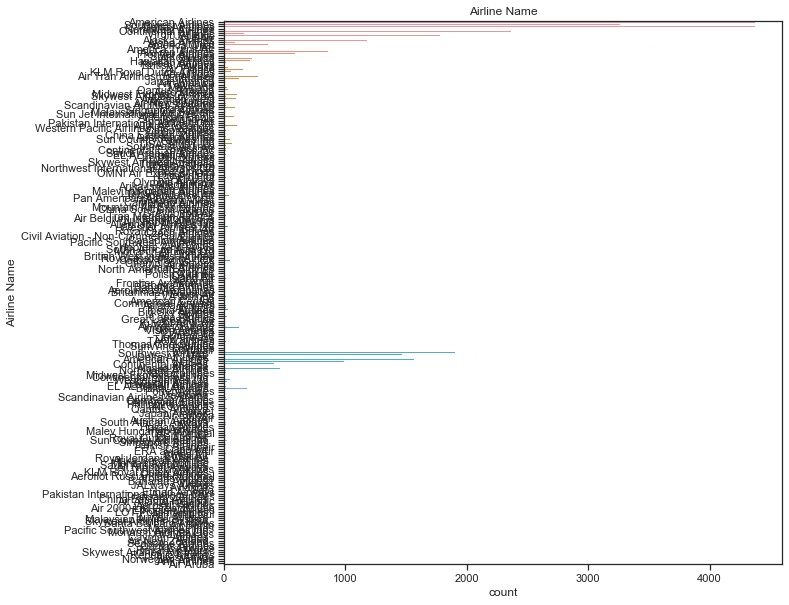

In [114]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Airline Name', data = tsa)
plt.title('Airline Name')

Text(0.5, 1.0, 'Airport Code')

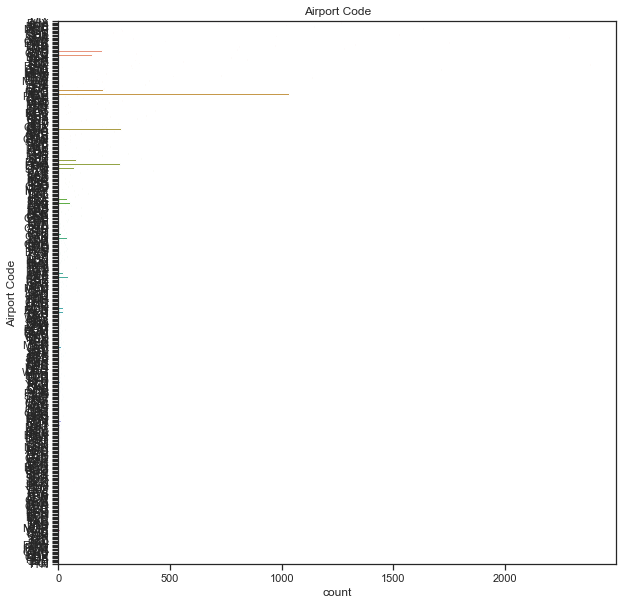

In [115]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Airport Code', data = tsa)
plt.title('Airport Code')

In [116]:
tsa[tsa['Airline Name'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22
5,2004050550501,2002-09-11,2002-08-05,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Passenger Property Loss,Checkpoint,Other,1200.00,Denied,NaN,Deny,37.0,NaN
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.0,Approve in Full,35.0,0.00
10,0616631L,2002-09-25,2002-08-15,MCO,Orlando International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),26.00,Approved,26.0,Approve in Full,41.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51059,2015100625929,2015-10-06,2015-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,NaN


In [117]:
tsa.groupby('Airline Name').count().sort_values(by = 'Claim Number', ascending = False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Airline Name,,,,,,,,,,,,,,
American Airlines,4377,4369,4361,4293,4293,4211,4368,4244,4226,4285,3891,3796,4353,3881
Delta Air Lines,4371,4370,4355,4287,4287,4210,4364,4228,4212,4281,3845,3752,4354,3830
UAL,3507,3506,3498,3447,3447,3385,3499,3387,3394,3444,3061,2923,3497,3049
Southwest Airlines,3258,3254,3247,3220,3220,3169,3250,3113,3132,3175,2750,2698,3243,2739
Continental Airlines,2363,2363,2356,2319,2319,2285,2356,2312,2328,2363,2261,2217,2356,2257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Air Inter Europe,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Liat Airlines,1,1,1,1,1,1,1,1,1,1,0,0,1,0
LOT Polish Airlines,1,1,1,1,1,1,1,1,1,1,0,0,1,0


In [118]:
tsa.groupby('Airport Code').count().sort_values(by = 'Claim Number', ascending = False)

,Claim Number,Date Received,Incident Date,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
Airport Code,,,,,,,,,,,,,,
LAX,2379,2377,2364,2379,1902,2279,2373,2305,2187,2223,1613,1586,2362,1602
JFK,2286,2285,2282,2286,2019,2233,2281,2174,2025,2050,1258,1250,2281,1253
EWR,1747,1747,1737,1747,1500,1676,1736,1681,1616,1638,1178,1177,1737,1173
ORD,1712,1712,1704,1712,1439,1652,1706,1650,1593,1620,1209,1199,1704,1201
MCO,1633,1630,1631,1633,1408,1592,1624,1561,1531,1546,970,956,1628,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOB,1,1,1,1,1,1,1,1,0,0,0,0,1,0
CYS,1,1,1,1,1,1,1,1,1,1,0,0,1,0
MOT,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [119]:
tsa['Airline Name'].value_counts()

American Airlines           4377
Delta Air Lines             4371
UAL                         3507
Southwest Airlines          3258
Continental Airlines        2363
                            ... 
Arika Isreali Airlines         1
SonAir                         1
Britannia Airways Ltd          1
Big Sky Airlines               1
Aero California                1
Name: Airline Name, Length: 242, dtype: int64

In [120]:
tsa[tsa['Airline Name'] == 'Southwest Airlines']['Airline Name'].value_counts()

Southwest Airlines    3258
Name: Airline Name, dtype: int64

In [121]:
tsa[tsa['Airline Name'] == 'Delta Air Lines']['Airline Name'].value_counts()

Delta Air Lines    4371
Name: Airline Name, dtype: int64

In [122]:
tsa[tsa['Airline Name'] == 'American Airlines']['Airline Name'].value_counts()

American Airlines    4377
Name: Airline Name, dtype: int64

In [123]:
tsa[tsa['Airline Name'] == 'UAL']['Airline Name'].value_counts()

UAL    3507
Name: Airline Name, dtype: int64

In [124]:
tsa[tsa['Airline Name'] == 'Skywest Airlines Inc USA']['Airline Name'].value_counts()

Skywest Airlines Inc USA    21
Name: Airline Name, dtype: int64

Based on the value counts of the Airlines Names and ranked from (https://upgradedpoints.com/us-airlines-marketshare-north-america/), I found that the US airlines with the most passengers carried are Southwest Airlines, Delta Airlines, American Airlines, United Airlines, and SkyWest Airlines respectively. The interesting part is, based on this data, I found that the ranking is not found. For example, Southwest Airlines has the most carried passengers according to the data from the link I attached, but on this data, Southwest Airlines is not even the 4th best. It is beaten by the likes of Delta, American Airlines, and UAL.

In [125]:
tsa['Airport Code'].value_counts()

LAX    2379
JFK    2286
EWR    1747
ORD    1712
MCO    1633
       ... 
BRL       1
CMX       1
FKL       1
SHD       1
GST       1
Name: Airport Code, Length: 404, dtype: int64

In [126]:
tsa[tsa['Airport Code'] == 'LAX']['Airline Name'].value_counts()

UAL                   258
American Airlines     245
Delta Air Lines       167
Southwest Airlines    133
Alaska Airlines       132
                     ... 
Alitalia                1
Turkish Airlines        1
Japan Airlines          1
Japan Airlines          1
Avianca                 1
Name: Airline Name, Length: 99, dtype: int64

In [127]:
tsa[tsa['Airport Code'] == 'JFK']['Airline Name'].value_counts()

Jet Blue                 550
Delta Air Lines          255
American Airlines        229
Delta Air Lines          179
American Airlines        105
                        ... 
Arik Airlines              1
Aerolineas Argentinas      1
Frontier Airlines          1
Independence Air           1
Olympic Airways            1
Name: Airline Name, Length: 113, dtype: int64

In [128]:
tsa[tsa['Airport Code'] == 'EWR']['Airline Name'].value_counts()

Continental Airlines      624
UAL                       155
UAL                       106
Continental Airlines       99
American Airlines          86
                         ... 
Korean Airlines             1
Austrian Airlines           1
Singapore Airlines          1
Aloha Airlines              1
Avianca                     1
Name: Airline Name, Length: 68, dtype: int64

In [129]:
tsa[tsa['Airport Code'] == 'ORD']['Airline Name'].value_counts()

UAL                                      486
American Airlines                        306
UAL                                      129
American Airlines                        113
Delta Air Lines                           52
                                        ... 
Thai Airways                               1
American Eagle                             1
Qantus Airways                             1
Royal Dutch Airlines                       1
Pakistan International Airlines Cor        1
Name: Airline Name, Length: 72, dtype: int64

In [130]:
tsa[tsa['Airport Code'] == 'MCO']['Airline Name'].value_counts()

Southwest Airlines               148
Jet Blue                         133
Delta Air Lines                  131
American Airlines                101
Continental Airlines             100
Southwest Airlines                95
AirTran Airlines                  93
Delta Air Lines                   74
USAir                             70
American Airlines                 54
UAL                               47
Spirit Airlines                   47
UAL                               42
USAir                             38
Air Tran Airlines(do not use)     32
Northwest Airlines                30
Virgin Atlantic                   28
Continental Airlines              17
Frontier Airlines                 15
Alaska Airlines                   10
Air Canada                         9
Midwest Express Airlines           9
Virgin America                     8
Westjet Airlines Ltd               8
Sun Country Airlines Inc           8
British Airways                    5
Allegiant Air                      5
D

In [131]:
tsa[tsa['Airport Code'] == 'ATL']['Airline Name'].value_counts()

Delta Air Lines                  600
Delta Air Lines                  308
AirTran Airlines                 115
American Airlines                 42
Air Tran Airlines(do not use)     32
USAir                             26
Southwest Airlines                19
UAL                               18
USAir                             18
Air France                        17
Frontier Airlines                 15
Southwest Airlines                15
Continental Airlines              14
Northwest Airlines                14
American Airlines                 12
UAL                                7
Lufthansa                          7
Continental Airlines               7
Air Canada                         5
British Airways                    5
KLM Royal Dutch Airlines           5
Midwest Express Airlines           3
Spirit Airlines                    3
America Trans Air                  2
Independence Air                   2
Delta (Song)                       2
Air Jamaica                        2
A

In [132]:
cramers_v(tsa['Airport Code'], tsa['Airline Name'])

0.15845352510098287

In [133]:
chi2_contingency(pd.crosstab(tsa['Airport Code'], tsa['Airline Name']))

(340842.18494823854,
 0.0,
 94713,
 array([[6.72092284e-02, 1.52748246e-02, 6.10992986e-04, ...,
         3.05496493e-02, 6.10992986e-04, 6.10992986e-04],
        [2.15069531e-02, 4.88794389e-03, 1.95517755e-04, ...,
         9.77588777e-03, 1.95517755e-04, 1.95517755e-04],
        [4.86594814e-01, 1.10589730e-01, 4.42358922e-03, ...,
         2.21179461e-01, 4.42358922e-03, 4.42358922e-03],
        ...,
        [2.95720605e-02, 6.72092284e-03, 2.68836914e-04, ...,
         1.34418457e-02, 2.68836914e-04, 2.68836914e-04],
        [1.07534766e-02, 2.44397194e-03, 9.77588777e-05, ...,
         4.88794389e-03, 9.77588777e-05, 9.77588777e-05],
        [1.88185840e-02, 4.27695090e-03, 1.71078036e-04, ...,
         8.55390180e-03, 1.71078036e-04, 1.71078036e-04]]))

Another thing that I found interesting is that the top 3 busiest Airports in the US, which are ATL, ORD, and LAX have differences in terms of the most airplanes that carried passengers from their airports. ATL = Delta, ORD = United Airlines, and LAX = United Airlines. United Airlines is the most common airplane name found on ORD and LAX, while the busiest airport in the US has Delta as the most found airplane name. Another interesting thing, is that I found that a couple of airplane name are counted more than once, e.g. Delta Air Lines in ATL. I also found that the correlation between Airport Code and Airline Name is there, but not a big value, 0.15845352510098287, 

In [134]:
cramers_v(tsa['Airport Code'], tsa['Day Differences'])

0.06660797352926777

In [135]:
chi2_contingency(pd.crosstab(tsa['Airport Code'], tsa['Day Differences']))

(413165.92154567665,
 0.0,
 326833,
 array([[6.36746431e-04, 6.36746431e-04, 6.36746431e-04, ...,
         6.36746431e-04, 6.36746431e-04, 6.36746431e-04],
        [2.25942282e-04, 2.25942282e-04, 2.25942282e-04, ...,
         2.25942282e-04, 2.25942282e-04, 2.25942282e-04],
        [4.62154668e-03, 4.62154668e-03, 4.62154668e-03, ...,
         4.62154668e-03, 4.62154668e-03, 4.62154668e-03],
        ...,
        [1.43781452e-04, 1.43781452e-04, 1.43781452e-04, ...,
         1.43781452e-04, 1.43781452e-04, 1.43781452e-04],
        [1.37619390e-03, 1.37619390e-03, 1.37619390e-03, ...,
         1.37619390e-03, 1.37619390e-03, 1.37619390e-03],
        [8.21608298e-05, 8.21608298e-05, 8.21608298e-05, ...,
         8.21608298e-05, 8.21608298e-05, 8.21608298e-05]]))

I also found that the correlation between Airport Code and Day Differences is very low, which is 0.06660797352926777.

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [136]:
np.random.seed(101)

In [137]:
df = not_outlier_ad.dropna()

In [138]:
df = df.sample(1000)

In [139]:
df.to_csv('tsa_claims_dashboard_ujian.csv', index=False)

Export the data to your SQL database, and try to connect the database to the dashboard